## Submitted by: Ashwini Sanku (M2021ANLT007), TISS Analytics 

# HRA- Behavioral Modelling to Predict Renege

## Part 1 : General Data Preprocessing 

In [2]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the data from current working directory
df = pd.read_csv("C:/Users/ashwi/Downloads/HRA/IMB553-XLS-ENG.csv")

In [4]:
#Glancing through the data 
df.head(5)

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status,Joined
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,1
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,1
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,1
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,1
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,1


In [5]:
df.shape

(12333, 18)

In [6]:
#Checking the number of rows and columns in the dataframe

rows_df=df.shape[0]
cols_df=df.shape[1]
print("Number of Rows in the dataframe are %d "%rows_df)
print("Number of columns in the dataframe are %d "%cols_df)

Number of Rows in the dataframe are 12333 
Number of columns in the dataframe are 18 


In [7]:
df.dtypes

Candidate Ref                    int64
DOJ Extended                    object
Duration to accept offer       float64
Notice period                    int64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
Joined                           int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                12333 non-null  int64  
 1   DOJ Extended                 12333 non-null  object 
 2   Duration to accept offer     9614 non-null   float64
 3   Notice period                12333 non-null  int64  
 4   Offered band                 12333 non-null  object 
 5   Pecent hike expected in CTC  11586 non-null  float64
 6   Percent hike offered in CTC  11737 non-null  float64
 7   Percent difference CTC       11482 non-null  float64
 8   Joining Bonus                12333 non-null  object 
 9   Candidate relocate actual    12333 non-null  object 
 10  Gender                       12333 non-null  object 
 11  Candidate Source             12333 non-null  object 
 12  Rex in Yrs                   12333 non-null  int64  
 13  LOB             

In [9]:
df=df.drop(['Candidate Ref'], axis = 1)

In [10]:
df.head(5)

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status,Joined
0,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,1
1,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,1
2,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,1
3,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,1
4,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,1


In [11]:
df.describe()

,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age,Joined
count,9614.000000,12333.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000,12333.000000
mean,21.189619,37.943323,41.837663,37.772016,-2.078916,4.160788,30.232304,0.707452
std,26.410351,24.526587,29.435844,35.593317,19.997159,2.810108,4.178853,0.454951
min,-228.000000,0.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000,0.000000
25%,2.000000,30.000000,25.000000,20.000000,-9.090000,3.000000,27.000000,0.000000
50%,9.000000,30.000000,38.890000,34.480000,0.000000,4.000000,30.000000,1.000000
75%,32.000000,60.000000,52.170000,47.060000,0.000000,6.000000,34.000000,1.000000
max,224.000000,120.000000,359.770000,471.430000,300.000000,26.000000,64.000000,1.000000


In [12]:
#Checking for Null values 
df.isna().sum()

DOJ Extended                      0
Duration to accept offer       2719
Notice period                     0
Offered band                      0
Pecent hike expected in CTC     747
Percent hike offered in CTC     596
Percent difference CTC          851
Joining Bonus                     0
Candidate relocate actual         0
Gender                            0
Candidate Source                  0
Rex in Yrs                        0
LOB                               0
Location                          0
Age                               0
Status                            0
Joined                            0
dtype: int64

<AxesSubplot:>

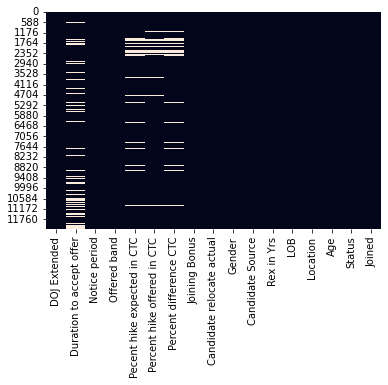

In [13]:
#visualising the null values in the dataset
sns.heatmap(df.isna(),cbar=False)

In [14]:
#find the % of null values in  df 
(df['Duration to accept offer'].isna().sum()/len(df['Duration to accept offer']))*100

22.046541798426986

In [15]:
# drop all rows with any NaN and NaT values
df1 = df.dropna()

<AxesSubplot:>

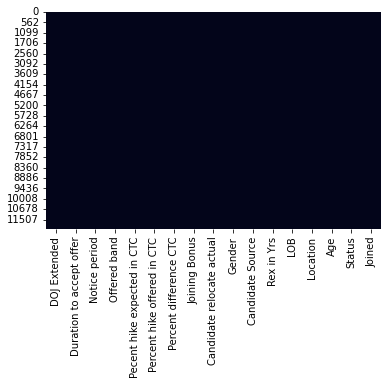

In [16]:
#Checking for null values after dropping null values 
sns.heatmap(df1.isna(),cbar=False)

In [17]:
#Checking for Null values 
df1.isna().sum()

DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
Joined                         0
dtype: int64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9011 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DOJ Extended                 9011 non-null   object 
 1   Duration to accept offer     9011 non-null   float64
 2   Notice period                9011 non-null   int64  
 3   Offered band                 9011 non-null   object 
 4   Pecent hike expected in CTC  9011 non-null   float64
 5   Percent hike offered in CTC  9011 non-null   float64
 6   Percent difference CTC       9011 non-null   float64
 7   Joining Bonus                9011 non-null   object 
 8   Candidate relocate actual    9011 non-null   object 
 9   Gender                       9011 non-null   object 
 10  Candidate Source             9011 non-null   object 
 11  Rex in Yrs                   9011 non-null   int64  
 12  LOB                          9011 non-null   object 
 13  Location         

In [19]:
df1.shape

(9011, 17)

In [20]:
df1 = df1.astype({"Notice period":'float', "Age":'float'}) 
df1.dtypes

DOJ Extended                    object
Duration to accept offer       float64
Notice period                  float64
Offered band                    object
Pecent hike expected in CTC    float64
Percent hike offered in CTC    float64
Percent difference CTC         float64
Joining Bonus                   object
Candidate relocate actual       object
Gender                          object
Candidate Source                object
Rex in Yrs                       int64
LOB                             object
Location                        object
Age                            float64
Status                          object
Joined                           int64
dtype: object

In [21]:
#Print all the columns
df1.columns

Index(['DOJ Extended', 'Duration to accept offer', 'Notice period',
       'Offered band', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC',
       'Joining Bonus', 'Candidate relocate actual', 'Gender',
       'Candidate Source', 'Rex in Yrs', 'LOB', 'Location', 'Age', 'Status',
       'Joined'],
      dtype='object')

In [22]:
#Checking for unique value counts is each category of the dataset 
for column in df1.columns:
    if df1[column].dtype == object:
        print(str(column)+':'+ str(df1[column].unique()))
        print(df1[column].value_counts())
        print('-------------------------------------------')

DOJ Extended:['Yes' 'No']
No     4802
Yes    4209
Name: DOJ Extended, dtype: int64
-------------------------------------------
Offered band:['E2' 'E1' 'E3' 'E0']
E1    5578
E2    2717
E3     505
E0     211
Name: Offered band, dtype: int64
-------------------------------------------
Joining Bonus:['No' 'Yes']
No     8593
Yes     418
Name: Joining Bonus, dtype: int64
-------------------------------------------
Candidate relocate actual:['No' 'Yes']
No     7717
Yes    1294
Name: Candidate relocate actual, dtype: int64
-------------------------------------------
Gender:['Female' 'Male']
Male      7457
Female    1554
Name: Gender, dtype: int64
-------------------------------------------
Candidate Source:['Agency' 'Employee Referral' 'Direct']
Direct               4808
Agency               2587
Employee Referral    1616
Name: Candidate Source, dtype: int64
-------------------------------------------
LOB:['ERS' 'INFRA' 'Healthcare' 'BFSI' 'CSMP' 'ETS' 'AXON' 'EAS' 'MMS']
INFRA         2861
ER

<AxesSubplot:xlabel='count', ylabel='LOB'>

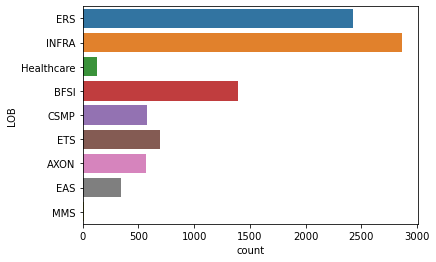

In [23]:
sns.countplot(y='LOB',data=df1)

<AxesSubplot:xlabel='Rex in Yrs', ylabel='count'>

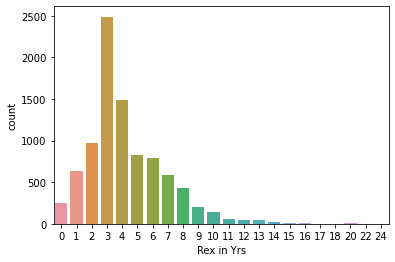

In [24]:
sns.countplot(x='Rex in Yrs',data=df1)

<AxesSubplot:xlabel='count', ylabel='Location'>

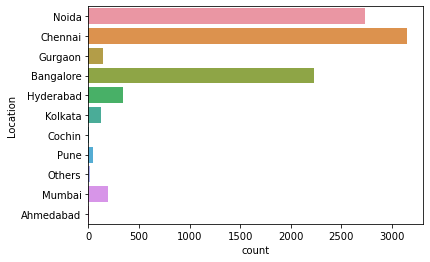

In [25]:
sns.countplot(y='Location',data=df1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

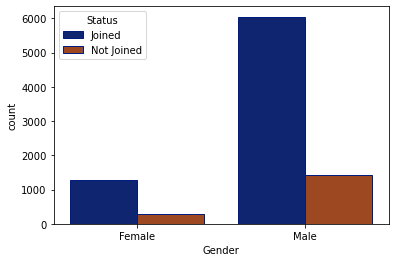

In [26]:
sns.countplot(x='Gender', hue='Status', data = df1, palette="dark", edgecolor=sns.color_palette("dark", n_colors = 1))

<AxesSubplot:xlabel='Candidate Source', ylabel='count'>

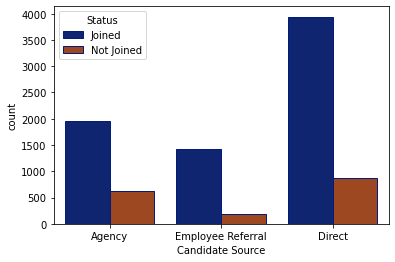

In [27]:
sns.countplot(x='Candidate Source', hue='Status', data = df1, palette="dark", edgecolor=sns.color_palette("dark", n_colors = 1))

<AxesSubplot:xlabel='DOJ Extended', ylabel='count'>

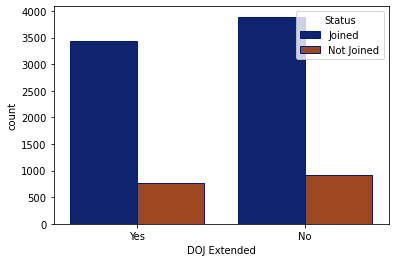

In [28]:
sns.countplot(x='DOJ Extended', hue='Status', data = df1, palette="dark", edgecolor=sns.color_palette("dark", n_colors = 1))

In [29]:
df2=df1.drop(['Status'], axis = 1)

<AxesSubplot:>

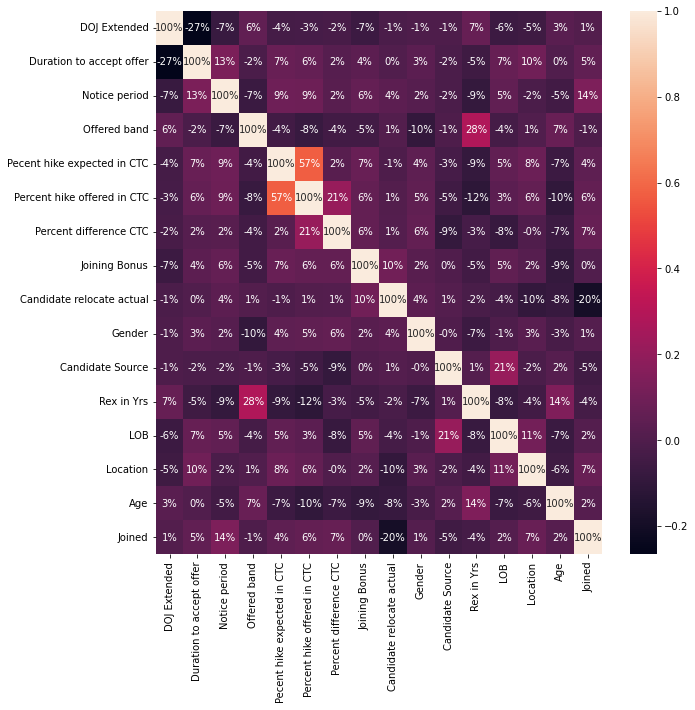

In [30]:
#Checking for the correlation between all variables in the dataset
plt.figure(figsize=(10,10)) #10in by 10in
sns.heatmap(df2.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1), annot=True, fmt='.0%')

## PART 2 : Machine Learning Model- Logistic Regression

In [31]:
#Transform the data 
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df2.columns:
        if df2[column].dtype == np.number:
            continue
        df2[column] = LabelEncoder().fit_transform(df2[column])

C:\Users\ashwi\AppData\Local\Temp/ipykernel_21220/1449401976.py:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df2[column].dtype == np.number:


In [32]:
df2.head(10)

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Joined
0,1,14.0,30.0,2,-20.79,13.16,42.86,0,0,0,0,7,4,8,34.0,1
1,0,18.0,30.0,2,50.00,320.00,180.00,0,0,1,2,8,7,2,34.0,1
2,0,3.0,45.0,2,42.84,42.84,0.00,0,0,1,0,4,7,8,27.0,1
3,0,26.0,30.0,2,42.84,42.84,0.00,0,0,1,2,4,7,8,34.0,1
4,1,1.0,120.0,2,42.59,42.59,0.00,0,1,1,2,6,7,8,34.0,1
5,1,17.0,30.0,1,42.83,42.83,0.00,0,0,1,2,2,7,8,34.0,1
6,1,37.0,30.0,2,31.58,31.58,0.00,0,0,1,2,7,7,8,32.0,1
8,1,16.0,0.0,1,-20.00,-20.00,0.00,0,0,0,1,8,6,8,34.0,1
10,0,1.0,30.0,1,-22.22,-22.22,0.00,0,0,0,2,3,1,4,26.0,1
11,0,6.0,30.0,1,240.00,220.00,-5.88,0,0,1,2,3,2,2,34.0,1


In [33]:
X = df2.drop(columns='Joined', axis=1)
Y = df2['Joined']

In [34]:
# Splitting the data into Training data & Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
X_train

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age
11400,0,3.0,30.0,1,40.63,40.63,0.00,0,0,1,0,3,4,1,34.0
11771,1,31.0,30.0,1,90.48,42.86,-25.00,0,0,1,2,2,7,2,34.0
8169,0,2.0,30.0,1,41.09,32.28,-6.25,0,0,1,0,6,5,8,29.0
6830,0,3.0,30.0,1,20.00,20.00,0.00,0,0,0,0,1,7,8,27.0
3158,1,6.0,90.0,1,54.64,54.64,0.00,0,1,1,1,2,2,8,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,1,18.0,30.0,1,87.50,39.06,-25.83,0,1,1,0,4,4,2,28.0
3518,1,2.0,45.0,1,20.00,-24.00,-36.67,0,0,0,2,1,4,8,25.0
8584,1,5.0,30.0,1,62.50,50.00,-7.69,0,0,0,2,4,4,2,29.0
3604,1,40.0,30.0,1,30.95,30.95,0.00,0,0,1,1,4,1,1,28.0


In [36]:
Y_train

11400    1
11771    0
8169     1
6830     1
3158     1
        ..
1390     1
3518     1
8584     1
3604     1
9473     1
Name: Joined, Length: 7208, dtype: int64

In [37]:
X_test

,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age
4145,0,2.0,60.0,2,15.47,7.39,-7.00,0,0,1,0,6,4,5,29.0
6138,1,57.0,45.0,2,20.29,10.67,-8.00,0,1,1,2,9,0,8,34.0
10979,0,2.0,30.0,1,50.00,83.33,22.22,0,0,1,1,3,5,1,34.0
10036,0,1.0,30.0,1,81.82,93.18,6.25,0,0,1,1,1,4,8,34.0
3851,0,29.0,30.0,1,39.76,26.51,-9.48,0,0,1,1,3,4,2,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,0,1.0,30.0,2,40.00,40.00,0.00,0,0,1,1,4,7,8,29.0
4184,1,7.0,60.0,1,33.33,16.67,-12.50,0,0,1,0,3,4,2,25.0
11417,0,1.0,30.0,1,30.43,13.04,-13.33,0,0,1,1,1,7,8,34.0
3987,0,2.0,30.0,2,22.11,22.11,0.00,0,0,1,1,5,0,8,28.0


In [38]:
Y_test

4145     0
6138     1
10979    1
10036    0
3851     1
        ..
7309     1
4184     0
11417    1
3987     0
303      1
Name: Joined, Length: 1803, dtype: int64

In [39]:
Y_test.sum()

1450

In [40]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [41]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predict=log_reg.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix 

In [44]:
pd.DataFrame(confusion_matrix(Y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,24,329
Actual Yes,19,1431


24 = True Negative,
1431 = True Positive,
19 = False Negative,
329 = False Positive 

In [45]:
#Checking for model accuracy score
from sklearn import metrics
print(metrics.accuracy_score(Y_test, predict))

0.8069883527454242


In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.56      0.07      0.12       353
           1       0.81      0.99      0.89      1450

    accuracy                           0.81      1803
   macro avg       0.69      0.53      0.51      1803
weighted avg       0.76      0.81      0.74      1803



Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more
features (which we dropped earlier) and/or by using other model

Note:

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class 

F1 score: F1 Score is the weighted average of Precision and Recall

In [48]:
#Checking for each probability for the testing dataset
prob_predict=log_reg.predict_proba(X_test)
prob_predict

array([[0.38803205, 0.61196795],
       [0.00678358, 0.99321642],
       [0.15821592, 0.84178408],
       ...,
       [0.102558  , 0.897442  ],
       [0.17049997, 0.82950003],
       [0.11494764, 0.88505236]])

In [52]:
probs = prob_predict[:, 1]
probs

array([0.61196795, 0.99321642, 0.84178408, ..., 0.897442  , 0.82950003,
       0.88505236])

In [56]:
from sklearn.metrics import log_loss
loss = log_loss(Y_test, probs)
loss

0.4390770764461765

Log Loss is the most important classification metric based on probabilities. For any given problem, a lower log-loss value means better predictions

In [58]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)

In [59]:
thresholds

array([1.99845633, 0.99845633, 0.9935972 , 0.99357207, 0.99338018,
       0.9932565 , 0.95497584, 0.95446057, 0.95335423, 0.95307524,
       0.94699521, 0.94698054, 0.94527772, 0.94518679, 0.94078681,
       0.94009078, 0.93873091, 0.93796861, 0.93454126, 0.93450694,
       0.93067471, 0.93044046, 0.92987714, 0.92941442, 0.92630299,
       0.92586853, 0.91459186, 0.9138588 , 0.91278508, 0.91254115,
       0.91213839, 0.91189957, 0.90746522, 0.90718524, 0.90645319,
       0.90588958, 0.90486071, 0.90485516, 0.90472378, 0.90429953,
       0.90191148, 0.90156666, 0.89987987, 0.89970663, 0.89872116,
       0.89852999, 0.8979323 , 0.89779096, 0.89739875, 0.89666743,
       0.89463565, 0.8945208 , 0.89171323, 0.89150798, 0.88647897,
       0.88637743, 0.88628352, 0.88594082, 0.88533968, 0.88513717,
       0.8843761 , 0.88428431, 0.88392619, 0.88391362, 0.88377564,
       0.88323193, 0.88308624, 0.8830831 , 0.88189387, 0.88180471,
       0.88104406, 0.88081332, 0.87866789, 0.87853233, 0.87562

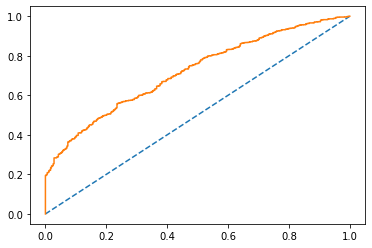

In [61]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
# show the plot
plt.show()

In [49]:
import statsmodels.api as sm
model = sm.OLS(Y,X).fit() 

In [50]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([0.00008228, 0.0000015 , 0.00003576, ..., 0.00000006, 0.00000026,
       0.00000433]), array([1., 1., 1., ..., 1., 1., 1.]))


## Thank you!